# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

## Objetivos

Después de completar este lab seras capas de:

*   Explorar en profundidad la librería Matplotlib
*   Crear pie charts, box plots, scatter plots y bubble charts

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Explorar Datasets con *p*andas](#0)<br>
2.  [Descargar y preparar información](#2)<br>
3.  [Visualizar información usando Matplotlib](#4) <br>
4.  [Pie Charts](#6) <br>
5.  [Box Plots](#8) <br>
6.  [Scatter Plots](#10) <br>
7.  [Bubble Plots](#12) <br>

</div>


# Explorando Datasets con *pandas* y Matplotlib<a id="0"></a>

Herramientas: El curso depende fuertemente de [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) para arreglo de la información, análisis y visualización. la principal librería para gráficar que exploraremos en este curso sera [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Inmigración a Canada desde 1980 hasta 2013 - [Flujo de inmigración internacional desde y hasta países elegidos - revision del 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) de la pagina de las Naciones unidas.

El dataset contiene información anual del flujo internacional de migrantes registrado por los países de destino. La información presenta ambos flujos entradas y salidas de acuerdo al lugar del nacimiento, ciudadanía o lugar previo/ siguiente lugar de residencia tanto como para extranjeros como nacionales. En este lab, nos enfocaremos en la información de Inmigración de Canada.

# Descargando y preparando la información <a id="2"></a>


Lo primero que debemos hacer es instalar **openpyxl** (anteriormente **xlrd**), un modulo que *pandas* requiere para leer archivos Excel.

In [10]:
# pip install openpyxl

Importamos los módulos principales

In [11]:
import numpy as np
import pandas as pd

Descargar el dataset de la inmigración de Canada y pasarlo a un dataframe de *pandas*

In [12]:
import urllib.request
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = urllib.request.urlopen(URL)

if resp.getcode()==200:
    content = resp.read()
    df_can = pd.read_excel(io.BytesIO(content),
                           sheet_name="Canada by Citizenship",
                           skiprows=range(20),
                           skipfooter=2)
    print("Data downloaded and read into a dataframe!")
else:
    print("Error al descargar el archivo")

Data downloaded and read into a dataframe!


Veamos los primeros 5 elementos en nuestro dataset.

In [13]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos cuantas entradas tiene nuestro Dataset.

In [14]:
# usaremos print para ver las dimensiones de nuestro Dataset.
print(df_can.shape)

(195, 43)


Limpiar la información. Haremos algunas modificaciones al dataset original para que sea mas fácil crear nuestras visualizaciones. Referencia a *Introduction to Matplotlib and Line Plots* y *Area Plots, Histograms, y Bar Plots* para una descripción detallada del proceso.

In [15]:
# Limpiar el dataset para remover las columnas innecesarias(ej. REG)
df_can.drop(["AREA","REG","DEV","Type","Coverage"],axis=1, inplace=True)

# Renombraremos las columnas para que tengan sentido.
df_can.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"}, inplace=True)

# Por el bien de la consistencia, haremos que todos los rótulos de las columnas sean de tipo string
df_can.columns= list(map(str,df_can.columns))

# Fijaremos el nombre de los países como index.
df_can.set_index("Country",inplace=True)

# Agregamos la columna Total
df_can["Total"]= df_can.iloc[:,4:].sum(axis=1)

# Crearemos una lista llamada years que nos servirá a través de los ejemplos y ejercicios del lab.
years = list(map(str,range(1980,2014)))
print("Data dimension:", df_can.shape)

Data dimension: (195, 38)


# Visualización de información usando Matplotlib<a id="4"></a>


In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot") # Opcional: para ggplot-like style

# Verificar la ultima version de matplotlib
print("Version de Matplotlib: ", mpl.__version__)

Version de Matplotlib:  3.7.2


# Pie Charts <a id="6"></a>

Un `pie chart` es un gráfico circular que muestra proporciones numeras al dividir un circulo (o pie) en pedazos o tajadas proporcionales. Tu ya puedes estar mas o menos familiarizado con los gráficos de pieya que son usados en negocios y media. Podemos crear gráficos de pie en Matplotlib al pasar en la palabra clave`kind=pie`.

Usaremos un gráfico de pie para explorar las proporciones(porcentajes) de nuevos inmigrantes por continentes por el periodo completo de 1980 a 2013.

Paso 1: Reunir información.

Usaremos el método *pandas* `groupby`para resumir la información de los inmigrantes por `Continent`. El proceso general de `groupby` envuelve los siguientes pasos:

1.  **Split:** Dividir la información en grupos basados en algún criterio.
2.  **Apply:** Aplicar una función a cada grupo independientemente:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combinar los resultas en una estructura de datos.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">

In [18]:
# Agrupar países por continente y aplicar la función sum().
df_continents= df_can.groupby("Continent",axis=0).sum()

# Nota: el resultado del método groupby es un objeto groupby.
# No podremos usar mas a menos que apliquemos una función (e.j .sum())

print(type(df_can.groupby("Continent",axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,614997
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3286769
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1371187
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,752067
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,231764


Paso 2: Gráficar la información. Pasaremos la palabra clave (keyword) en `kind = 'pie'`, seguido de los siguientes parámetros:

*   `autopct` -  es un string o función usada para rotular las cuñas con su valor numérico. El rotulo debe ser puesto dentro de la cuña. Si el formato es un string, el rotulo sera `fmt%pct`.
*   `startangle` - Rota el comienzo del gráfico de pie en grados en contra del sentido del reloj desde el `eje-x`.
*   `shadow` - Dibuja una sombra bajo el pie (para darle una sensación 3D).

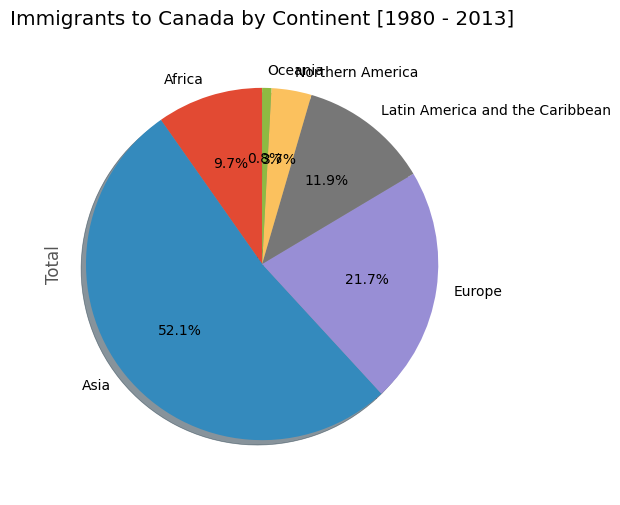

In [19]:
# autopct crea %, start angle representa el punto de inicio.
df_continents["Total"].plot(kind="pie",
                            figsize=(5,6),
                            autopct = "%1.1f%%", # Agrega los porcentajes
                            startangle = 90, # Angulo de inicio 90º (Africa)
                            shadow = True, # Agrega sombra
                            )

plt.title("Immigrants to Canada by Continent [1980 - 2013]")
plt.axis("equal")

plt.show()

La visual de arriba no esta clara, los números y textos se sobreponen en algunos sectores. Hagamos algunas modificaciones para mejorar la visual:

*   Remover los rótulos de gráfico de pie al pasar `legend` y agregar lo por separado usando legend en `plt.legend()`.
*   Mueve hacia afuera los porcentajes para que este justo afuera del gráfico de pie al pasar el parámetro `pctdistance`.
*   Pase un conjunto de colores personalizados para cada continente al pasar el parámetro `colors`.
*   **Destaca** el gráfico de pie para enfatizar los tres continentes mas bajos (Africa, North America, and Latin America and Caribbean) al pasar el parámetro `explode`.

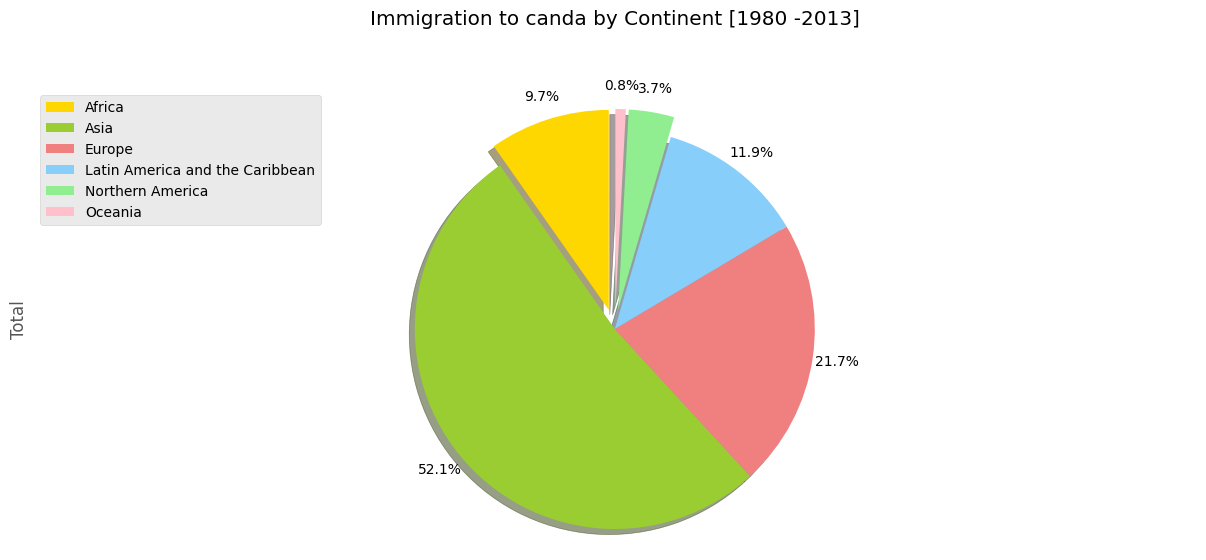

In [25]:
color_list = ["gold","yellowgreen","lightcoral","lightskyblue","lightgreen","pink"]
explode_list=[0.1,0,0,0,0.1,0.1]

df_continents["Total"].plot(kind="pie",
                            figsize=(15,6),
                            autopct = "%1.1f%%",
                            startangle =90,
                            shadow = True,
                            labels = None,
                            pctdistance = 1.12,
                            colors = color_list,
                            explode = explode_list
                            )

plt.title("Immigration to canda by Continent [1980 -2013]", y= 1.12)

plt.axis("equal")

plt.legend(labels=df_continents.index, loc="upper left")

plt.show()

**Pregunta:** Usando un gráfico de pie, explora las proporciones (porcentaje) de nuevos inmigrantes agrupados por continentes en 2013.

**Nota**: Puedes tener que jugar con los valores de explore para poder arreglar los valores sobrepuestos en las tajadas.

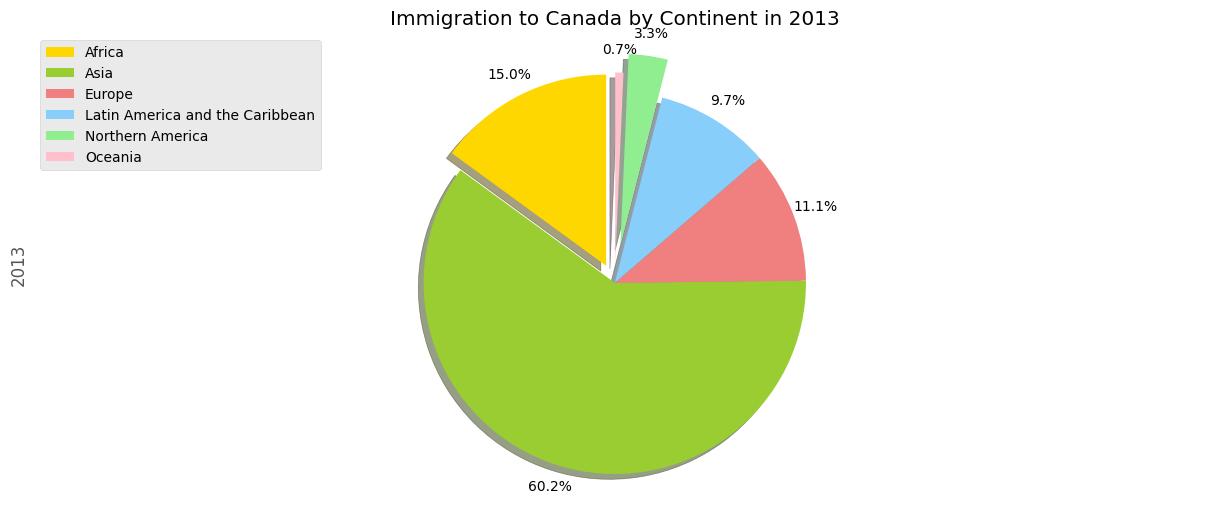

In [29]:
explode_list=[0.1,0,0,0,0.2,0.1]
df_continents["2013"].plot(kind="pie",
                           figsize=(15,6),
                           autopct="%1.1f%%",
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           pctdistance = 1.12,
                           colors = color_list,
                           explode = explode_list                           
                           )

plt.title("Immigration to Canada by Continent in 2013")
plt.axis("equal")

plt.legend(labels=df_continents.index,loc="upper left")

plt.show()

# Box Plots <a id="8"></a>

Un `box plot` es una manera de representar estadisticamente lae *distribución* de la información a traves de cinco dimensiones principales:

*   **Minimum:** El numero mas pequeño en el dataset excluyendo los valores atípicos.
*   **First quartile:** Número que se encuentra en medio del valor `minimum` y el `median`.
*   **Second quartile (Median):** Número medio del data set (ordenado).
*   **Third quartile:** Numero medio entre `median` y `maximum`.
*   **Maximum:** El numero mas grande del dataset excluyendo los valores atípicos.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


Para hacer un `boxplot`, debemos usar `kind=box` en el método `plot` invoca una serie o dataframe de*pandas*.

Vamos a hacer un box plot para los inmigrantes japoneses entre los años 1980 - 2013.